In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

reading train data

In [2]:
trainData = pd.read_csv('../data/raw/train.csv')
trainData.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
print("Number of rows in training data:", trainData.shape[0])

Number of rows in training data: 1306122


reading test data

In [4]:
testData = pd.read_csv('../data/raw/test.csv')
testData.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [5]:
print("Number of rows in test data:", testData.shape[0])

Number of rows in test data: 375806


In [6]:
def generatePieChart(data, colName):
    percentage = data[colName].value_counts(normalize=True)
    values = [colName+' '+str(i) for i in percentage.index]
    plt.pie(percentage, labels=values, autopct='%1.1f%%', shadow=True)
    plt.show()
    return

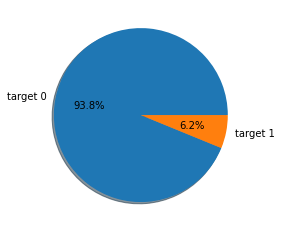

In [7]:
generatePieChart(trainData, 'target')

In [8]:
def generateBarPlot(data, colName):
    count = data[colName].value_counts()
    values = [str(i) for i in count.index]
    plt.bar(values, count)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ylabel(colName+' count')
    plt.xlabel(colName);
    plt.grid(axis='y', linestyle='--')
    plt.show()
    return

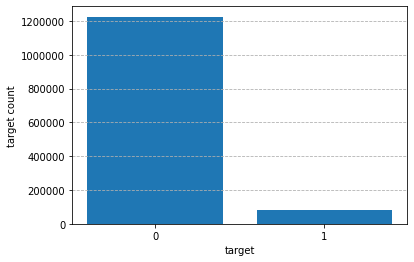

In [9]:
generateBarPlot(trainData, 'target')

In [10]:
dfTrain = trainData.copy()
dfTest = testData.copy()

In [11]:
def preprocessText(data):
    # Keep letters and white space
    s = re.sub(r'[^A-Za-z ]+', '', data)
    # Lower case
    s = s.lower()
    # Remove additional white space
    s = ' '.join(s.split())   
    return s

In [12]:
dfTrain['question_text'] = dfTrain['question_text'].apply(preprocessText)

In [24]:
def generateWordCloud(data):
    
    # Combine
    text = " ".join(data.tolist())
    
    # Remove stop words
    words = text.split()
    words = " ".join([w for w in words if w not in STOPWORDS])
    
    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate(words)

    # Plot the result
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    return

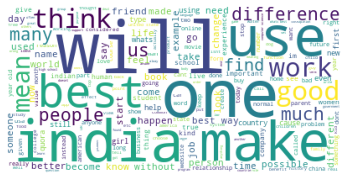

In [26]:
generateWordCloud(dfTrain[dfTrain['target']==0].question_text)

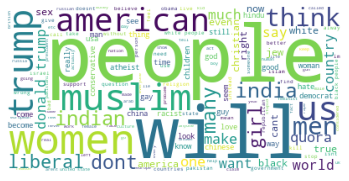

In [25]:
generateWordCloud(dfTrain[dfTrain['target']==1].question_text)